In [1]:
import sys
import json
import base64
import numpy as np
from scipy import misc

import matplotlib.pyplot as plt

from pathlib import Path

import skvideo.io

In [2]:
PATH = Path.cwd()

In [3]:
DATA_PATH = Path('../data')

In [10]:
# file = sys.argv[-1]
file = '../data/val_video.mp4'
# file = '../data/actual_test_video.mp4'
video = skvideo.io.vread(file)

In [11]:
video.shape

(31, 600, 800, 3)

In [12]:
def decode(packet):
	img = base64.b64decode(packet)
	filename = PATH/'image.png'
	with open(filename, 'wb') as f:
			f.write(img)
	result = misc.imread(filename)
	return result

with open(PATH/'results.json') as json_data:
	ans_data = json.loads(json_data.read())
	json_data.close()

frames_processed = 0

In [13]:
video[0].shape

(600, 800, 3)

In [14]:
len(video)

31

In [15]:
len(ans_data.keys())

30

In [34]:
video_new = np.concatenate((video[:15], video[16:]))

In [35]:
video_new.shape

(30, 600, 800, 3)

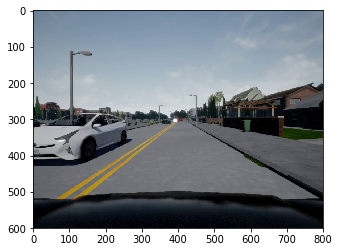

In [44]:
plt.imshow(video_new[15])

/home/paperspace/anaconda3/envs/lyft/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


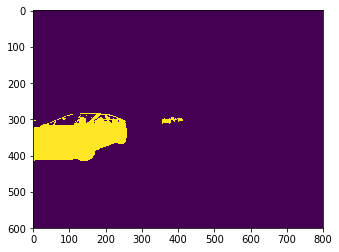

In [43]:
plt.imshow(decode(ans_data[str(16)][0]))

In [18]:
c = decode(ans_data[str(30)][0])
r = decode(ans_data[str(30)][1])

/home/paperspace/anaconda3/envs/lyft/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


In [19]:
res = np.zeros_like(video[0])

In [20]:
VEHICLES=10
ROADS=7
ROAD_LINES=6

In [21]:
res[c] = VEHICLES
res[r] = ROADS

In [45]:

import scipy.misc

In [61]:
(DATA_PATH/f'AnswersSeg').mkdir(exist_ok=True)
(DATA_PATH/f'AnswersRGB').mkdir(exist_ok=True)

In [62]:
ans_data.keys()

dict_keys(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30'])

In [63]:
video.shape

(31, 600, 800, 3)

In [64]:
rlist = []
for frame in range(1,len(ans_data.keys())+1):
    res = np.zeros_like(video_new[frame-1])
    c = decode(ans_data[str(frame)][0])
    r = decode(ans_data[str(frame)][1])
    res[c==True] = VEHICLES
    res[r==True] = ROADS
    rlist.append(res)
    scipy.misc.imsave(DATA_PATH/f'AnswersSeg/{frame-1}.png', res)
    scipy.misc.imsave(DATA_PATH/f'AnswersRGB/{frame-1}.png', video_new[frame-1])

/home/paperspace/anaconda3/envs/lyft/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  
/home/paperspace/anaconda3/envs/lyft/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  if __name__ == '__main__':
/home/paperspace/anaconda3/envs/lyft/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
frame = ans_data['16']

In [ ]:
# frame[0]

In [ ]:
res = np.zeros_like(video[0])
c = decode(frame[0])
# res = np.zeros_like(c)
r = decode(frame[1])
plt.imshow(r)
print(np.mean(c))
res[c==True] = VEHICLES
print(np.mean(res))
res[r==True] = ROADS
print(np.mean(r))
print(np.mean(res))

In [ ]:
plt.imshow(res[:,:,0])

In [ ]:
plt.imshow(rlist[15][:,:,1])

In [ ]:
plt.imshow(video[16])

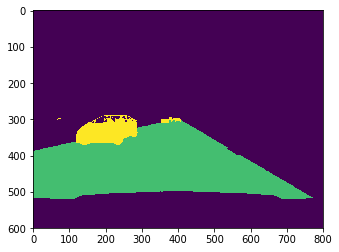

In [70]:
plt.imshow(plt.imread(str(DATA_PATH/f'AnswersSeg/{13}.png'))[:,:,0])

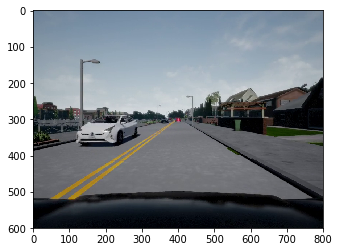

In [71]:
plt.imshow(plt.imread(str(DATA_PATH/f'AnswersRGB/{13}.png')))